In [1]:
import pandas as pd
from Models.GlassBox.figs.figs_class import FIGS_class
%reload_ext autoreload
%autoreload 2

In [2]:
FIGS_parameter = dict(
    max_rules= [5,10,15,20,25],
    max_trees=[2,3,4,5,6,7,8,9,10],
    min_impurity_decrease=[0.1, 0.2, 0.3],
)
gridsearch_parameters = dict(
    path="./../../../outputs/scores/",
    name="0",
    nDCG_at=15
)

# Grid-search

In [3]:
gs = FIGS_class(**gridsearch_parameters)

In [4]:
best_ = gs.grid_search(FIGS_parameter)
gs.save_model(best_[0], name="FIGSReg")

Finding the best model: 100%|██████████| 135/135 [02:17<00:00,  1.01s/it, nDCG=0.982]


# Metric evalutation

In [5]:
best_model = gs.load_model(name="./saved_models/FIGSReg")

In [6]:
# nDCG on test-set
nDCG_train = gs.eval_model(model=best_model, df=gs.train, nDCG_at=[1,10,15])
nDCG_valid = gs.eval_model(model=best_model, df=gs.valid, nDCG_at=[1,10,15])
nDCG_test = gs.eval_model(model=best_model, df=gs.test, nDCG_at=[1,10,15])

display(pd.DataFrame([nDCG_train,nDCG_valid,nDCG_test],index=["Training","Validation","Test"]))

,nDCG@1,nDCG@10,nDCG@15
Training,0.9328,0.9598,0.9677
Validation,0.9396,0.9754,0.9824
Test,0.9360,0.9636,0.9727


In [7]:
print(best_model)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
fitness_comp_basic <= 0.303 (Tree #0 root)
	fitness_edu_basic <= 0.500 (split)
		Val: 25.680 (leaf)
		fit_expertize <= 0.063 (split)
			Val: 35.038 (leaf)
			Val: 45.203 (leaf)
	fit_expertize <= 0.608 (split)
		fit_expertize <= 0.122 (split)
			fit_expertize <= 0.019 (split)
				Val: 51.738 (leaf)
				Val: 54.759 (leaf)
			fit_expertize <= 0.311 (split)
				Val: 58.310 (leaf)
				Val: 62.902 (leaf)
		fit_expertize <= 1.304 (split)
			fit_expertize <= 1.014 (split)
				fit_expertize <= 0.843 (split)
					Val: 67.553 (leaf)
					Val: 71.203 (leaf)
				Val: 76.663 (leaf)
			fit_expertize <= 1.588 (split)
				Val: 85.954 (leaf)
				Val: 101.664 (leaf)

	+
fit_edu_judgment <= 0.129 (Tree #1 root)
	Val: -1.675 (leaf)
	fit_edu_judgment <= 0.7

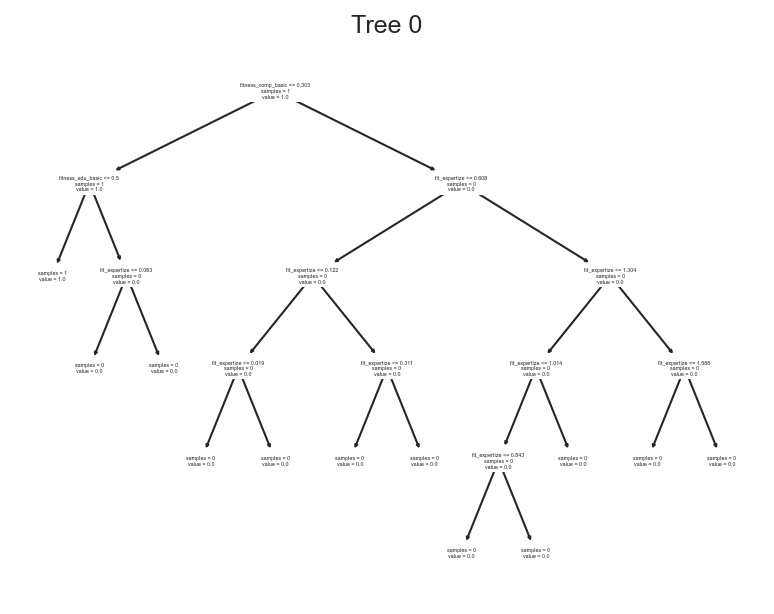

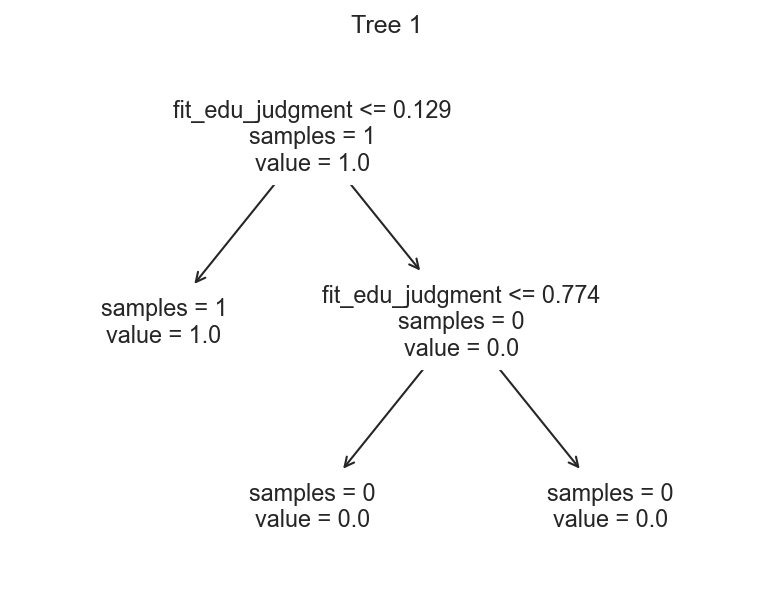

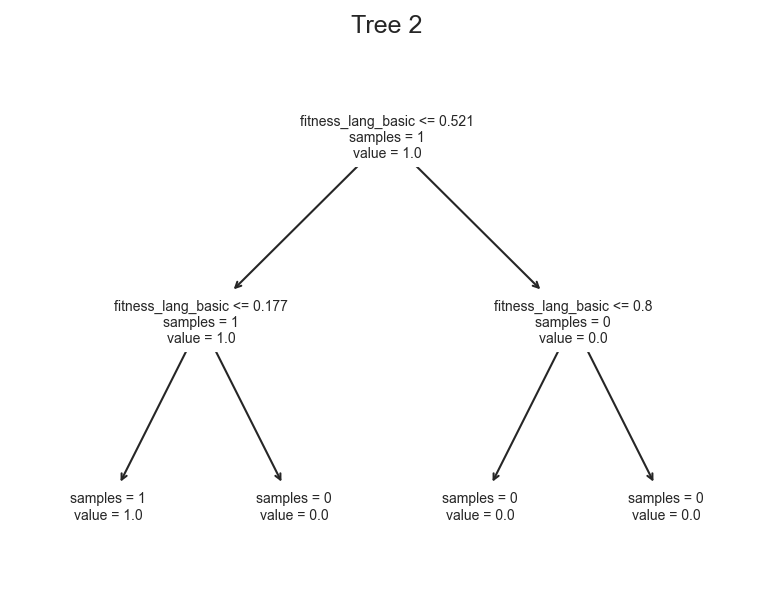

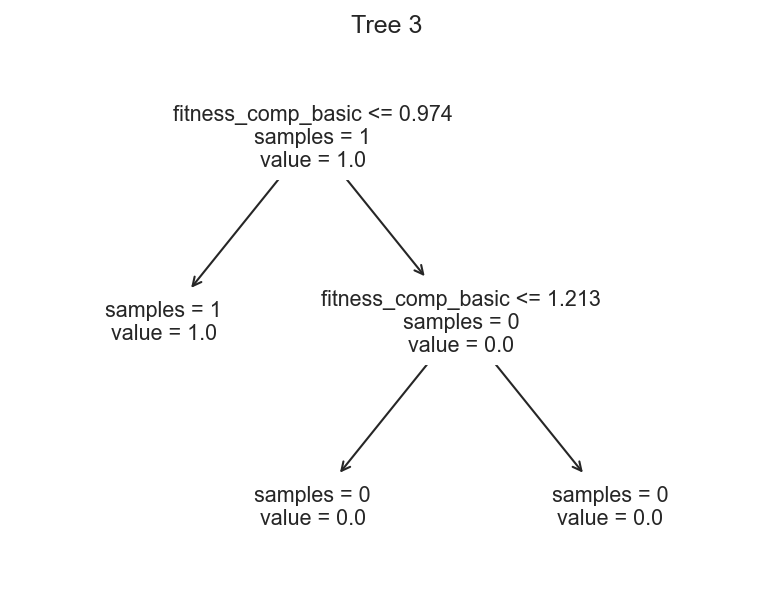

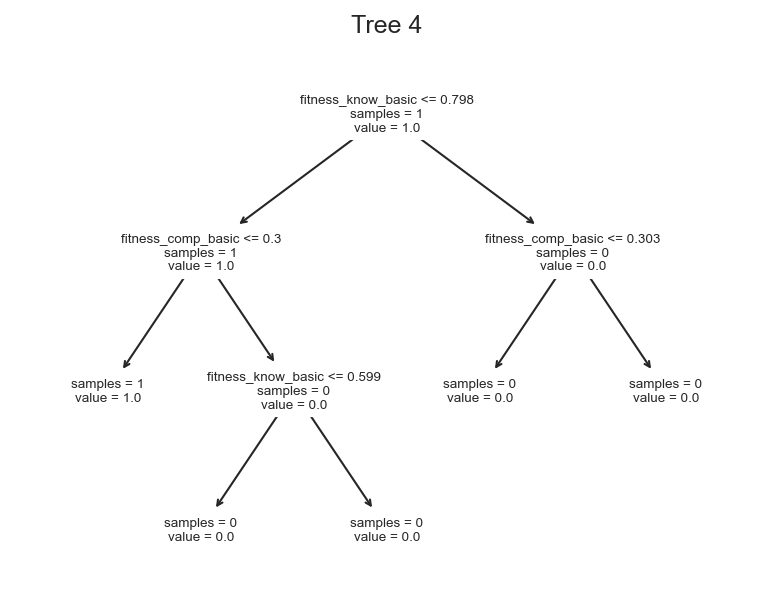

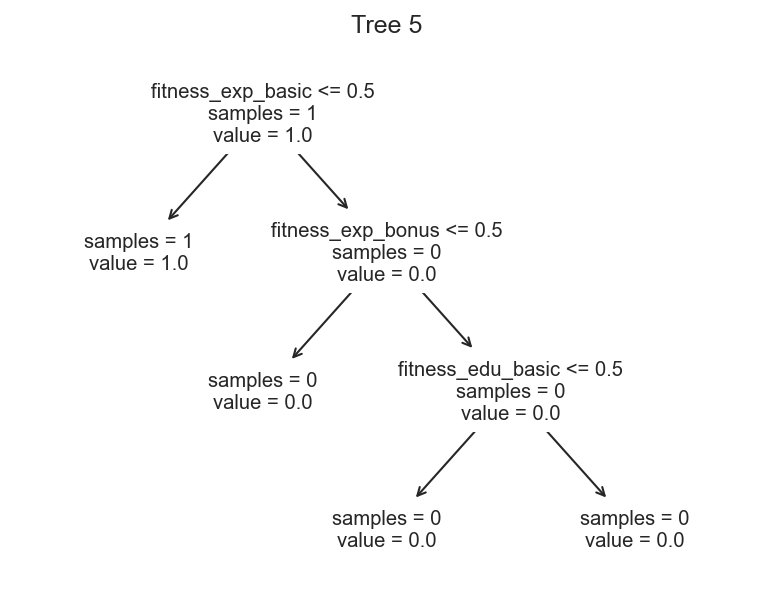

In [8]:
for i in range(len(best_model.trees_)):
    best_model.plot(tree_number=i)